In [195]:
from brian2 import *
import csv
import numpy as np

In [196]:
#Test read one file
file = []
# with open("dataset/left_hand_A2_V1.csv") as csvfile:
with open("test.csv") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader: # each row is a list
        file.append(row)
file = np.array(file).astype(int)

In [197]:
file.shape

(30, 2500)

In [198]:
# Code from documentation with TimedArray
start_scope()
ta2d = TimedArray([[1, 2], [3, 4], [5, 6]]*mV, dt=0.1*ms)
G = NeuronGroup(4, 'v = ta2d(t, i%2) : volt')
mon = StateMonitor(G, 'v', record=True)
net = Network(G, mon)
net.run(0.2*ms)  

print(mon.v[:])

[[1. 3.]
 [2. 4.]
 [1. 3.]
 [2. 4.]] mV


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] mV


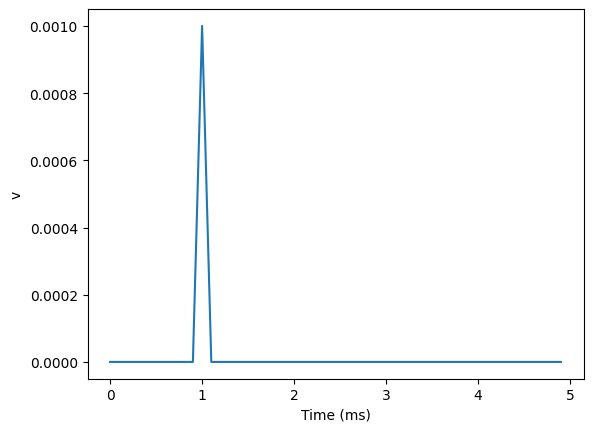

In [199]:
#Test to take the test file and set every frame as an input with 0.1ms delay
start_scope()
ta2d = TimedArray(file*mV, dt=0.1*ms)
G = NeuronGroup(2500, 'v = ta2d(t, i) : volt')
mon = StateMonitor(G, 'v', record=True)
net = Network(G, mon)
net.run(5*ms)

# monitor the 4th neurons voltage
print(mon.v[3])

plot(mon.t/ms, mon.v[3])
xlabel('Time (ms)')
ylabel('v');

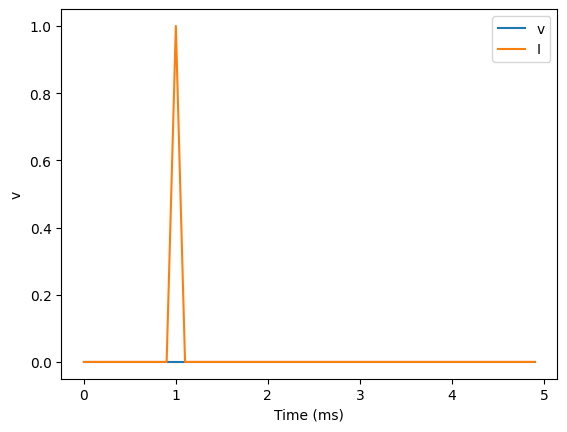

In [200]:
# Test create the timedarray as the current at each time step
start_scope()
tau = 0.2*ms
I_recorded = TimedArray(file, dt=0.1*ms)
eqs = '''
dv/dt = (I-v)/tau : 1
I = I_recorded(t, i) : 1
'''
G = NeuronGroup(2500, eqs, threshold='v>0.3', reset='v=0', method='exact')
M = StateMonitor(G, variables=True, record=True)
run(5*ms)

plot(M.t/ms, M.v[3], label='v')
plot(M.t/ms, M.I[3], label='I')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best');

In [201]:
# Extract the which neurons spikes and at which times they spike
spikes_i = []
spikes_t = []

dt = 0.1 * ms
frame_count = 1

for frame in file:
    for index in range(len(frame)):
        if frame[index] > 0:
            # print(index, frame_count*dt)
            spikes_i.append(index)
            spikes_t.append(frame_count*dt)
    frame_count += 1

In [202]:
# spikes_t, spikes_i

In [203]:
#Test to take the test file and set every frame as an input with 0.1ms delay
start_scope()
SGG = SpikeGeneratorGroup(2500, spikes_i, spikes_t)
M = SpikeMonitor(SGG)
run(5*ms)

print('Spike times: %s' % M.t[:])

Spike times: [0.3 0.5 0.5 ... 2.7 2.7 2.8] ms


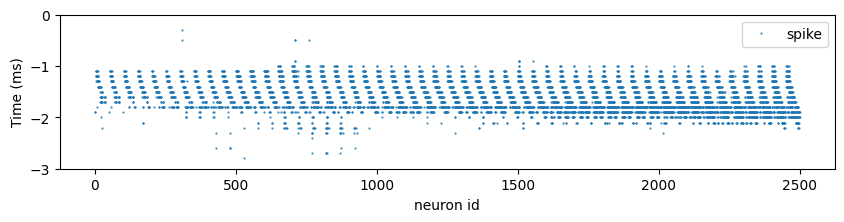

In [213]:
# plot the spikes neurons create (should be the same as the csv file)
figure(figsize=(10,2))
plot(M.i, -M.t/ms, 'o', label='spike', markersize=0.5)
ylim(-3, 0)
xlabel('neuron id')
ylabel('Time (ms)')
legend(loc='best')

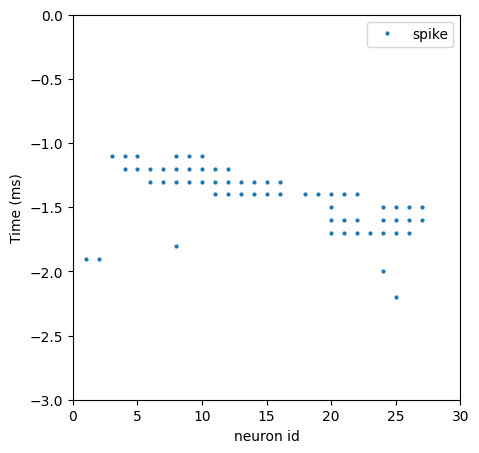

In [215]:
# zoom in on the first 30 neurons
figure(figsize=(5,5))
plot(M.i, -M.t/ms, 'o', label='spike', markersize=2)
ylim(-3, 0)
xlim(0, 30)
xlabel('neuron id')
ylabel('Time (ms)')
legend(loc='best')